#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv(r"D:\Maastricht\Period 1\Data Mining\Notes and Exam paper\churn-train.csv")

#### Check the data and table  

In [2]:
#Data Table
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,61,No,'No phone service',DSL,Yes,No,Yes,No,No,No,Month-to-month,No,'Bank transfer (automatic)',33.60,2117.2,No
1,Male,0,Yes,Yes,72,Yes,Yes,'Fiber optic',No,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',90.45,6565.85,No
2,Female,0,No,No,5,Yes,Yes,'Fiber optic',No,No,No,No,Yes,No,Month-to-month,Yes,'Electronic check',84.00,424.75,No
3,Female,0,No,No,49,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',67.40,3306.85,No
4,Male,0,No,No,8,Yes,No,No,'No internet service','No internet service','No internet service','No internet service','No internet service','No internet service',Month-to-month,Yes,'Bank transfer (automatic)',19.70,168.9,No


In [3]:
#check the categorical and numerical features
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695 entries, 0 to 4694
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4695 non-null   object 
 1   SeniorCitizen     4695 non-null   int64  
 2   Partner           4695 non-null   object 
 3   Dependents        4695 non-null   object 
 4   tenure            4695 non-null   int64  
 5   PhoneService      4695 non-null   object 
 6   MultipleLines     4695 non-null   object 
 7   InternetService   4695 non-null   object 
 8   OnlineSecurity    4695 non-null   object 
 9   OnlineBackup      4695 non-null   object 
 10  DeviceProtection  4695 non-null   object 
 11  TechSupport       4695 non-null   object 
 12  StreamingTV       4695 non-null   object 
 13  StreamingMovies   4695 non-null   object 
 14  Contract          4695 non-null   object 
 15  PaperlessBilling  4695 non-null   object 
 16  PaymentMethod     4695 non-null   object 


The info() represent the how many features/columns are present in the Table/data and also provide the information of each
feature data type.
The generally object data type are categorical feature And others  data type such as (Int 64 and float) 
are numerical feature.

In [4]:
dataset.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
#convert the object into float64 data type (Numerical value)
dataset["TotalCharges"]=pd.to_numeric(dataset["TotalCharges"],errors='coerce')
dataset.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        6
Churn               0
dtype: int64

In [6]:
#drop the na values from Total Charges
dataset.dropna(inplace = True)

In [7]:
#Change the predictor value in a binary numeric
Z=dataset.copy()
dataset["Churn"]=pd.Series(np.where(Z.Churn.values =="Yes",1,0),Z.index)

In [8]:
#Convert all the categorical variables into dummy variables
##from sklearn.preprocessing import OneHotEncoder
dataset.dropna(inplace=True)
data_dummies=pd.get_dummies(dataset)

In [9]:
data_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_'One year',Contract_'Two year',Contract_Month-to-month,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_'Bank transfer (automatic)',PaymentMethod_'Credit card (automatic)',PaymentMethod_'Electronic check',PaymentMethod_'Mailed check'
0,0,61,33.60,2117.20,0,0,1,0,1,0,...,0,0,0,1,1,0,1,0,0,0
1,0,72,90.45,6565.85,0,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
2,0,5,84.00,424.75,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
3,0,49,67.40,3306.85,0,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,8,19.70,168.90,0,0,1,1,0,1,...,0,0,0,1,0,1,1,0,0,0


#### Get Correlation  of "Churn" with  other variables :

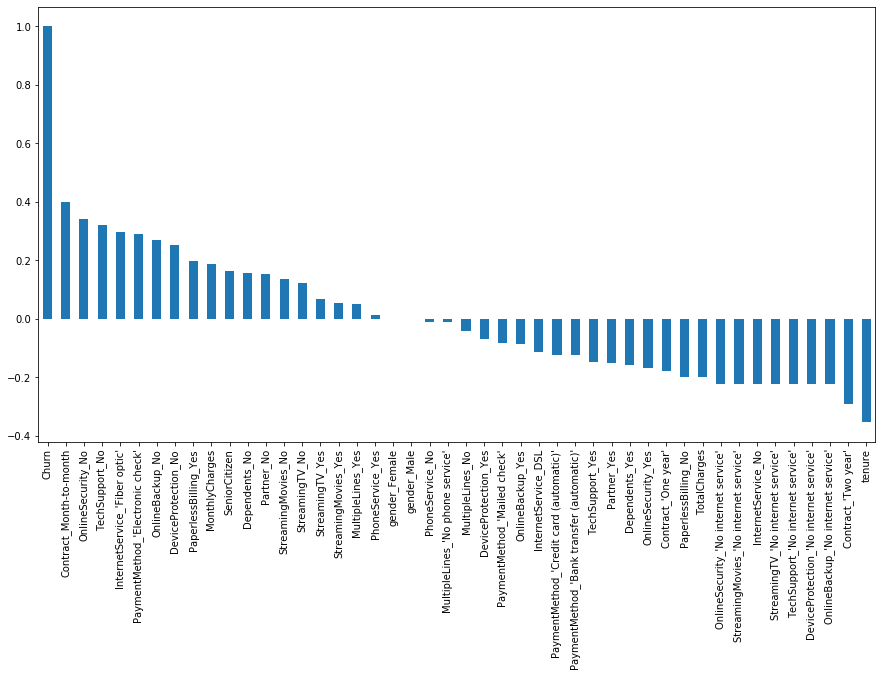

In [10]:
plt.figure(figsize=(15,8))
data_dummies.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")

There we can see that some feature has positive correlation and some has negative correlation. We can now explore the pattern for the above relation.

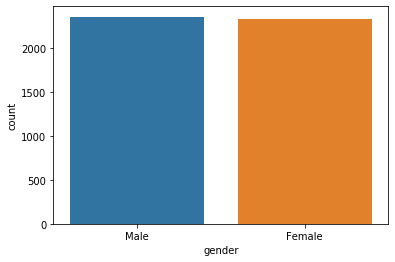

In [11]:
#Gender plot
sns.countplot(x='gender',data=dataset)

Here we can see that Gender ratio is almost same here.


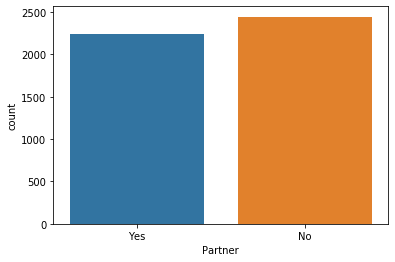

In [12]:
sns.countplot(x='Partner',data=dataset)

Almost half of the customers has partners

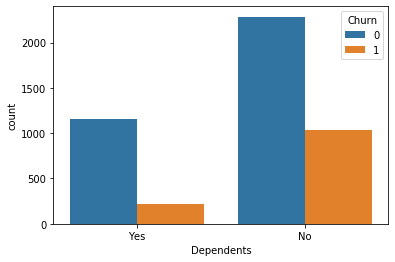

In [13]:
sns.countplot(x='Dependents',hue="Churn", data=dataset)

Here we can see that less number of dependents(30%) are customers 

Text(0.5, 1.0, '# customers by their tenure')

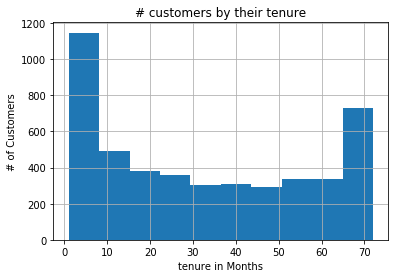

In [14]:
ax=dataset['tenure'].hist()
ax.set_ylabel("# of Customers")
ax.set_xlabel('tenure in Months')
ax.set_title("# customers by their tenure")

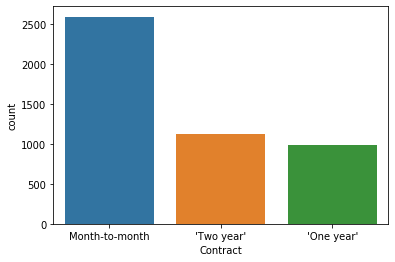

In [15]:
sns.countplot(x='Contract',data=dataset)

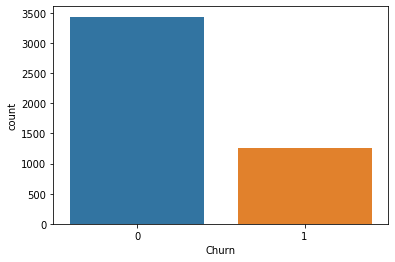

In [16]:
sns.countplot(x="Churn",data=dataset)

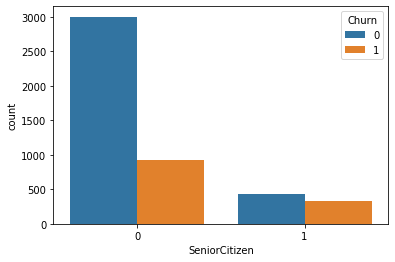

In [17]:
ax=sns.countplot(x="SeniorCitizen", hue ="Churn", data=dataset)

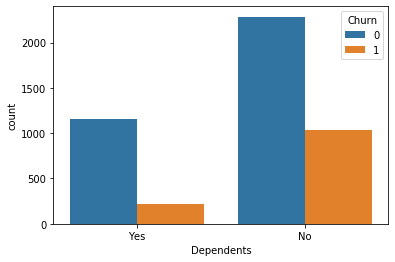

In [18]:
ax=sns.countplot(x="Dependents",hue="Churn", data=dataset)

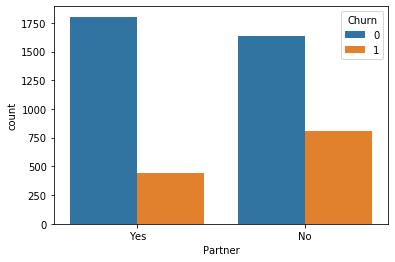

In [19]:
ax=sns.countplot(x="Partner",hue="Churn", data=dataset)

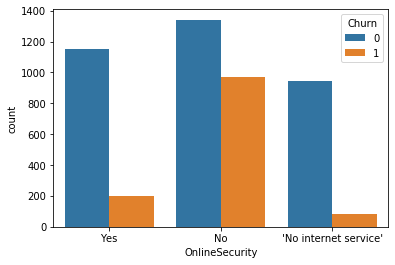

In [20]:
ax=sns.countplot(x="OnlineSecurity", hue="Churn", data=dataset)

we can see that those customer who has on-line Security has higher chance  to leave the company

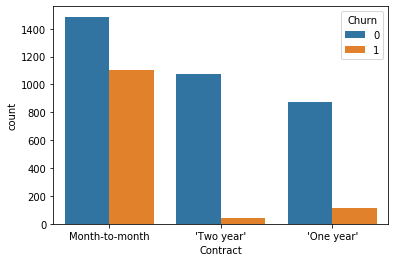

In [21]:
ax=sns.countplot(x="Contract", hue="Churn", data=dataset)

The customer who has month-to-month contract has willing to leaving company more

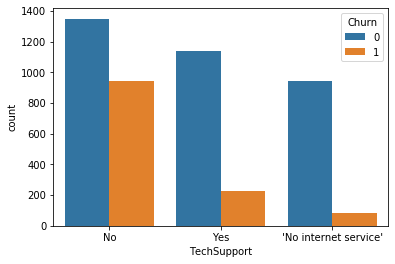

In [22]:
ax=sns.countplot(x="TechSupport",hue="Churn", data=dataset)

  Customer which has  no Techsupport also willing to leave

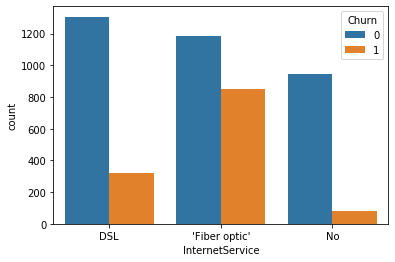

In [23]:
ax=sns.countplot(x="InternetService", hue="Churn", data=dataset)

InternetService which opted Fiber optic has willing to leave the company 

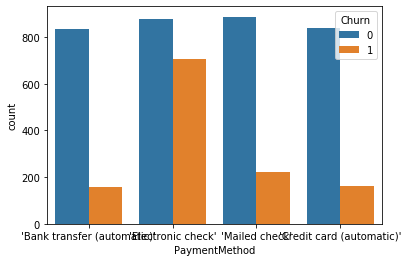

In [24]:
ax=sns.countplot(x="PaymentMethod", hue="Churn", data=dataset)

The Electronic check  paymentmethod chosen by the customer are leaving

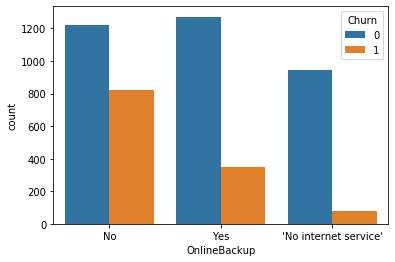

In [25]:
ax=sns.countplot(x="OnlineBackup", hue="Churn", data=dataset)

 The ONline Backup has not taken by customer also willing to leave the company

### Modelling of the data

#### Logistic Regression

In [44]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_validate
from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
#Predictor label
y=data_dummies["Churn"].values
#Feature values
X=data_dummies.drop(columns=["Churn"])
#Scaling th data
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [27]:
#Create Train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=101)

In [45]:
Cv_result= cross_validate(model, X, y, cv=3)
print(Cv_result)

{'fit_time': array([0.0989399 , 0.06596208, 0.06896162]), 'score_time': array([0.0019989 , 0.0019989 , 0.00199914]), 'test_score': array([0.79590531, 0.80486244, 0.79654511])}


In [28]:
model=LogisticRegression()
lg_model=model.fit(X_train,y_train)
from sklearn import metrics
p_test=model.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,p_test)*100)
print("Confusion Matrix :\n",confusion_matrix(y_test,p_test)) 
print("Precision Score",average_precision_score(y_test, p_test))
print((classification_report(y_test,p_test)))

Accuracy 78.53589196872778
Confusion Matrix :
 [[925  98]
 [204 180]]
Precision Score 0.4484965332637941
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1023
           1       0.65      0.47      0.54       384

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.77      1407



AxesSubplot(0.125,0.125;0.775x0.755)


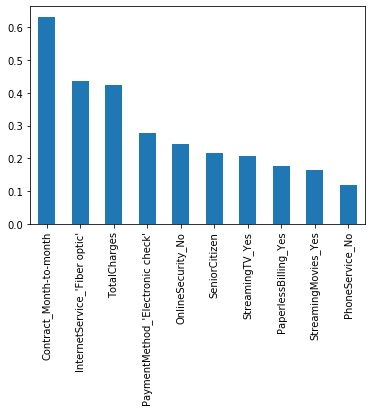

In [29]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


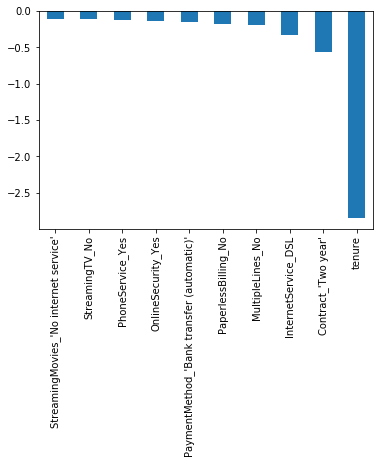

In [30]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

Key Points :
DSL internet service also reduces the probability of Churn

total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it. 

Tenure have the most negative relation with churn as predicted by logistic regression

#### Support machine Vector

In [31]:
from sklearn.svm import SVC
model_svm=SVC(kernel="linear")
fit_svm=model_svm.fit(X_train,y_train)
preds=model_svm.predict(X_test)
print("Accuracy",metrics.accuracy_score(y_test, preds)*100)
print("Confusion  Matrix : \n", confusion_matrix(y_test,preds))
print("Precision Score",average_precision_score(y_test,preds))


Accuracy 78.46481876332622
Confusion  Matrix : 
 [[923 100]
 [203 181]]
Precision Score 0.44789107730918365


In [46]:
Cv_result= cross_validate(fit_svm, X, y, cv=3)
print(Cv_result)

{'fit_time': array([0.52769947, 0.43774915, 0.43556523]), 'score_time': array([0.11193633, 0.09768319, 0.09992814]), 'test_score': array([0.79526552, 0.79270633, 0.79398592])}


#### Decision Tree

In [32]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf_fit=clf.fit(X_train,y_train)
pred_clf=clf.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,pred_clf)*100)
print("Confusion  Matrix : \n",confusion_matrix(y_test,pred_clf)) 
print("Precision Score",average_precision_score(y_test,pred_clf))
print((classification_report(y_test,pred_clf)))

Accuracy 71.64179104477611
Confusion  Matrix : 
 [[815 208]
 [191 193]]
Precision Score 0.37765157834358665
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1023
           1       0.48      0.50      0.49       384

    accuracy                           0.72      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.72      0.72      0.72      1407



In [47]:
Cv_result= cross_validate(clf, X, y, cv=3)
print(Cv_result)

{'fit_time': array([0.03197837, 0.02598405, 0.02998161]), 'score_time': array([0.00100064, 0.00199866, 0.00199986]), 'test_score': array([0.72744722, 0.71209213, 0.73320537])}


#### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
ensemble_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
ensemble_rf.fit(X_train, y_train)
prediction_test = ensemble_rf.predict(X_test)
print ("Accuracy",metrics.accuracy_score(y_test, prediction_test)*100)
print("Confusion  Matrix : \n",confusion_matrix(y_test,prediction_test))
print("Precision Score",average_precision_score(y_test, prediction_test))
print((classification_report(y_test,prediction_test)))

Accuracy 79.53091684434968
Confusion  Matrix : 
 [[953  70]
 [218 166]]
Precision Score 0.45900914992230135
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1023
           1       0.70      0.43      0.54       384

    accuracy                           0.80      1407
   macro avg       0.76      0.68      0.70      1407
weighted avg       0.78      0.80      0.78      1407



In [48]:
Cv_result= cross_validate(ensemble_rf, X, y, cv=3)
print(Cv_result)

{'fit_time': array([6.55953407, 3.80584335, 3.4338448 ]), 'score_time': array([0.4537766 , 0.34241509, 0.45086861]), 'test_score': array([0.79206654, 0.7971849 , 0.80230326])}


#### ADA Boost

In [34]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
ensemble_Ada = AdaBoostClassifier()
ensemble_Ada.fit(X_train,y_train)
preds = ensemble_Ada.predict(X_test)
print("Accuracy",metrics.accuracy_score(y_test, preds)*100)
print("Confusion  Matrix : \n",confusion_matrix(y_test,preds))
print("Precision Score",average_precision_score(y_test, preds))
print((classification_report(y_test,preds)))

Accuracy 79.03340440653874
Confusion  Matrix : 
 [[920 103]
 [192 192]]
Precision Score 0.46188428318456143
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1023
           1       0.65      0.50      0.57       384

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [49]:
Cv_result= cross_validate(ensemble_Ada, X, y, cv=3)
print(Cv_result)

{'fit_time': array([0.30482459, 0.29398751, 0.25046039]), 'score_time': array([0.03200316, 0.03197002, 0.03124666]), 'test_score': array([0.80038388, 0.78182981, 0.79910429])}


### Prediction data

In [35]:
dataset_test=pd.read_csv(r"D:\Maastricht\Period 1\Data Mining\Notes and Exam paper\churn-test.csv")
dataset_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,'No phone service',DSL,No,Yes,No,No,No,No,Month-to-month,Yes,'Electronic check',29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,'One year',No,'Mailed check',56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,'Mailed check',53.85,108.15,Yes
3,Male,0,No,No,45,No,'No phone service',DSL,Yes,No,Yes,Yes,No,No,'One year',No,'Bank transfer (automatic)',42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,'Fiber optic',No,No,No,No,No,No,Month-to-month,Yes,'Electronic check',70.70,151.65,Yes


In [36]:
#convert the object into float64 data type (Numerical value)
dataset_test["TotalCharges"]=pd.to_numeric(dataset_test["TotalCharges"],errors='coerce')
dataset.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [37]:
#Change the predictor value in a binary numeric
T=dataset_test.copy()
dataset_test["Churn"]=pd.Series(np.where(T.Churn.values =="Yes",1,0),T.index)

In [38]:
#Convert all the categorical variables into dummy variables
##from sklearn.preprocessing import OneHotEncoder
data_dummies_test=pd.get_dummies(dataset_test)
data_dummies_test.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_'One year',Contract_'Two year',Contract_Month-to-month,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_'Bank transfer (automatic)',PaymentMethod_'Credit card (automatic)',PaymentMethod_'Electronic check',PaymentMethod_'Mailed check'
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,0,0,1,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0


In [39]:
#Predictor label
y_test_data=data_dummies_test.iloc[:300,4:5].values
#Feature values
X_test_data=data_dummies_test.drop(columns=["Churn"])
X_test_data=X_test_data.iloc[:300,:].values

#### Prediction Test Using Logistic Regression 

In [40]:
prediction_test_data =model.predict(X_test_data)
print ("Accuracy",metrics.accuracy_score(y_test_data, prediction_test_data)*100)
print("Confusion  Matrix : \n",confusion_matrix(y_test_data,prediction_test_data))
print("Precision Score",average_precision_score(y_test_data, prediction_test_data))
print((classification_report(y_test_data,prediction_test_data)))

Accuracy 25.666666666666664
Confusion  Matrix : 
 [[  0 223]
 [  0  77]]
Precision Score 0.25666666666666665
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       223
           1       0.26      1.00      0.41        77

    accuracy                           0.26       300
   macro avg       0.13      0.50      0.20       300
weighted avg       0.07      0.26      0.10       300



C:\Users\Gupta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Using of logistic regression, It has predicted every customer is a churn, It is mean that every will be left the telecom company.. SO, If I give  10-euros for each customer then cost will be:
300*10= 3000 Euro
There is no customer predicted as loyal which is a churn.So, there is no loss of money

#### Prediction  Test  By Support machine vector  

In [41]:
prediction_test_data =model_svm.predict(X_test_data)
print ("Accuracy",metrics.accuracy_score(y_test_data, prediction_test_data)*100)
print("Confusion  Matrix : \n",confusion_matrix(y_test_data,prediction_test_data))
print("Precision Score",average_precision_score(y_test_data, prediction_test_data))
print((classification_report(y_test_data,prediction_test_data)))

Accuracy 74.33333333333333
Confusion  Matrix : 
 [[223   0]
 [ 77   0]]
Precision Score 0.25666666666666665
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       223
           1       0.00      0.00      0.00        77

    accuracy                           0.74       300
   macro avg       0.37      0.50      0.43       300
weighted avg       0.55      0.74      0.63       300



C:\Users\Gupta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
True Postive =223
false Negative =77
True Negative=00
False Positive=00


Total Churn predicted : 00
Total loyal=300

So, Predicted as churn cost will be:
10 euros *0= 0 euros

Every True Churn Predicted as loyal then loss will be:
64 euros*77=4928 euros

SyntaxError: invalid syntax (<ipython-input-42-7f3c1e005c58>, line 1)

#### Prediction Test by Decision Tree

In [ ]:
prediction_test_data =clf.predict(X_test_data)
print ("Accuracy",metrics.accuracy_score(y_test_data, prediction_test_data)*100)
print("Confusion  Matrix : \n",confusion_matrix(y_test_data,prediction_test_data))
print("Precision Score",average_precision_score(y_test_data, prediction_test_data))
print((classification_report(y_test_data,prediction_test_data)))

True Positive =79
false Negative =55
True Negative=22
False Positive=144


Total Churn predicted : 166
Total loyal=134

So, Predicted as churn cost will be:
10 euros *166=1660 euros

Every True Churn Predicted as loyal then loss will be:
64 euros*55= 3520 euros


#### Prediction Using Random Forest 

In [ ]:
prediction_test_data =ensemble_rf.predict(X_test_data)
print ("Accuracy",metrics.accuracy_score(y_test_data, prediction_test_data)*100)
print("Confusion  Matrix : \n",confusion_matrix(y_test_data,prediction_test_data))
print("Precision Score",average_precision_score(y_test_data, prediction_test_data))
print((classification_report(y_test_data,prediction_test_data)))

True Positive =123
false Negative =77
True Negative=00
False Positive=00


Total Churn predicted : 00
Total loyal=300

So, Predicted as churn cost will be:
10 euros *0=0 euros

Every True Churn Predicted as loyal then loss will be:
64 euros*77=4928 euros

#### Prediction using ADA Boost

In [ ]:
prediction_test_data =ensemble_Ada.predict(X_test_data)
print ("Accuracy",metrics.accuracy_score(y_test_data, prediction_test_data)*100)
print("Confusion  Matrix : \n",confusion_matrix(y_test_data,prediction_test_data))
print("Precision Score",average_precision_score(y_test_data, prediction_test_data))
print((classification_report(y_test_data,prediction_test_data)))

True Positive =00
false Negative =00
True Negative=77
False Positive=223


Total Churn predicted :300
Total loyal=00

So, Predicted as churn cost will be:
10 euros *300=3000 euros

Every True Churn Predicted as loyal then loss will be:
64 euros*0=0 euros

### Result

In [ ]:
I can say that  Logistic Regression or AdaBoost is good option to use for modelling for this data because it will save the
loss but we have give a gift to every one. (I choose based on the loss cost.(minimum loss cost.))